# <center>**Prediction of CO2 Emissions of Car using Simple Linear Regression**<center>

<center>In this notebook, we will use scikit-learn to predict CO2 emissions using simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value. </center>


###**Importing Dataset**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###**Downloading Dataset from IBM Object Storage**
We have downloaded a fuel consumption dataset `FuelConsumption.csv`, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

###**Data Exploration**

In [4]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


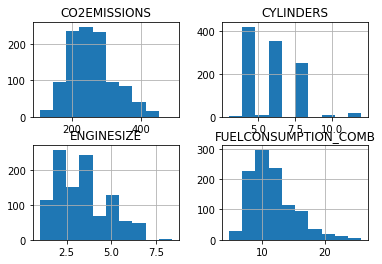

In [8]:
cdf.hist()
plt.show()

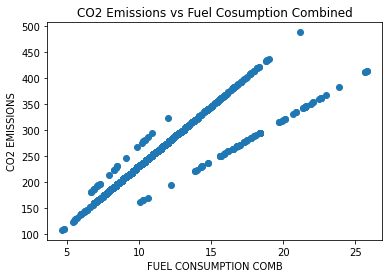

In [16]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS)
plt.xlabel('FUEL CONSUMPTION COMB')
plt.ylabel('CO2 EMISSIONS')
plt.title('CO2 Emissions vs Fuel Cosumption Combined')
plt.show()

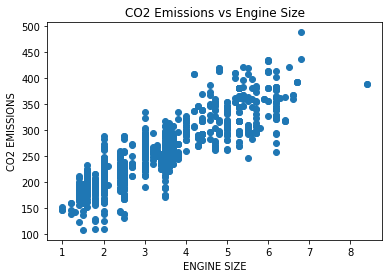

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.title('CO2 Emissions vs Engine Size')
plt.show()

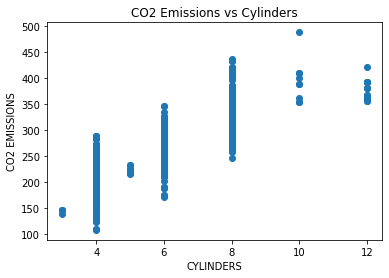

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS)
plt.xlabel('CYLINDERS')
plt.ylabel('CO2 EMISSIONS')
plt.title('CO2 Emissions vs Cylinders')
plt.show()

###**Creating Training and Test set using Numpy**
Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function

In [33]:
mask = np.random.rand(len(cdf)) < 0.8
training_set = cdf[mask]
testing_set = cdf[~mask]
print("Size of Training Set: ", training_set.shape[0])
print("Size of Testing Set: ", testing_set.shape[0])

Size of Training Set:  840
Size of Testing Set:  227


###**Simple Linear Regression**
In this section, we will fit a linear model into our data. We will use Engine Size as our feature to predict the CO2 emissions of Cars. The hypothesis model used for Simple Linear Regression is:

$$h(\theta) = \theta_{0} + \theta_{1}x$$

Where $\theta_{0}$ is called intercept and $\theta_{1}$ is known as coefficient.

In [34]:
from sklearn.linear_model import LinearRegression

#Splitting Features X and Label y
training_X = np.asanyarray(training_set[['ENGINESIZE']])
training_y = np.asanyarray(training_set[['CO2EMISSIONS']])

#Fitting Linear Model to our Data
regressor = LinearRegression()
regressor.fit(training_X, training_y)
print("Intercept: ", regressor.intercept_)
print("Coefficient: ", regressor.coef_)

Intercept:  [129.0924826]
Coefficient:  [[38.23409005]]


###**Visualizing Linear Model**

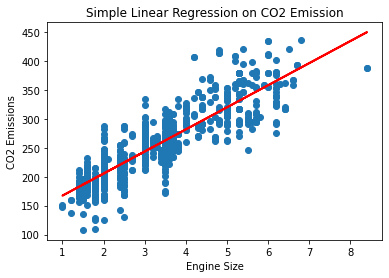

In [40]:
plt.scatter(training_X, training_y)
plt.plot(training_X, regressor.predict(training_X), color='red', linewidth=2)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Simple Linear Regression on CO2 Emission')
plt.show()

###**Model Evaluation**
We compare the actual values and predicted values to calculate the accuracy of a regression model.

There are different model evaluation metrics but we will be using Mean Squared Error (MSE) to evaluate our model.

**Mean Squared Error (MSE)** is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors.

**Root Mean Squared Error (RMSE)** - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [41]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(testing_set[['ENGINESIZE']])
test_y = np.asanyarray(testing_set[['CO2EMISSIONS']])
predict_y = regressor.predict(test_X)

print("Mean Abosulte Error (MAE): %.2f" % np.mean(np.absolute(predict_y - test_y)))
print("Mean Squared Error (MSE): %.2f" % np.mean((predict_y - test_y)**2))
print("R2 Score: %.2f" % r2_score(predict_y, test_y))

Mean Abosulte Error (MAE): 24.72
Mean Squared Error (MSE): 1077.45
R2 Score: 0.64


##**<center>Thank You for Completing the Notebook</center>**